# Projet DALAS 
## REGRESSION
### SOYKOK Aylin - CELIK Simay


Apprentissage sur les données de la pollution - années

But : estimer l'indice de pollution des années à venir

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../data/data_annees.csv')
for column in df.columns:
    if column != 'Country':
        df[column] = pd.to_numeric(df[column], errors='coerce')
df_fast = pd.read_pickle('../data/fastfashion_clean.pkl')
df_slow = pd.read_pickle('../data/slowfashion_clean.pkl')

In [3]:
df

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year,Generated
0,Switzerland,206.2,138.1,68.2,68.0,143.9,7.1,24.6,26.8,NaN,2014,0
1,United States,195.5,132.9,49.9,68.6,77.4,2.4,37.1,35.1,NaN,2014,0
2,Germany,192.7,112.3,72.9,75.3,87.1,5.6,36.1,30.2,NaN,2014,0
3,Sweden,180.9,106.1,61.7,75.2,103.7,9.4,34.1,17.5,NaN,2014,0
4,Finland,178.9,97.9,70.8,68.7,103.3,7.8,37.0,16.7,NaN,2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...
822,Iran,77.7,21.2,50.5,53.0,26.9,22.4,46.8,74.8,63.4,2024,0
823,Venezuela,77.3,12.6,18.8,38.7,39.4,15.2,32.8,75.6,99.9,2024,0
824,Sri Lanka,76.9,14.4,57.9,71.1,33.2,36.0,54.8,58.8,59.1,2024,0
825,Bangladesh,69.1,25.8,38.5,42.3,24.9,12.7,57.7,85.6,71.3,2024,0


Linear regression for pollution

In [4]:
from sklearn.linear_model import LinearRegression

grouped = df.groupby('Year')['Pollution Index'].mean().reset_index()
print('Mean pollution index per year')
print(grouped)
model = LinearRegression()

X = grouped['Year'].values.reshape(-1, 1)
y = grouped['Pollution Index'].values
model.fit(X, y)

future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030, 2031]).reshape(-1, 1)
predictions = model.predict(future_years)

print(predictions)

Mean pollution index per year
    Year  Pollution Index
0   2014        52.979412
1   2015        56.426744
2   2016        51.112500
3   2017        52.268657
4   2018        49.881667
5   2019        51.036620
6   2020        53.228750
7   2021        52.912048
8   2022        53.127586
9   2023        52.830952
10  2024        53.032941
[52.43418544 52.40294548 52.37170553 52.34046557 52.30922561 52.27798566
 52.2467457 ]


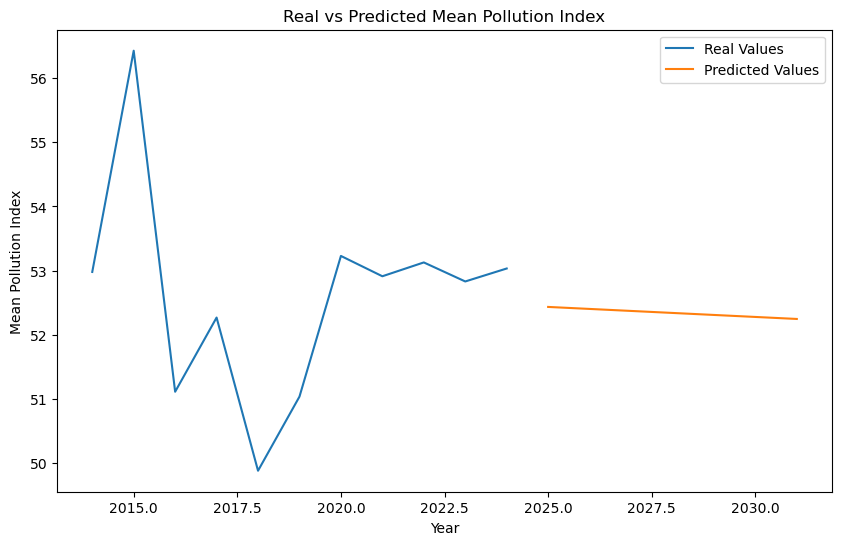

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(grouped['Year'], grouped['Pollution Index'], label='Real Values')
plt.plot(future_years, predictions, label='Predicted Values')
plt.xlabel('Year')
plt.ylabel('Mean Pollution Index')
plt.title('Real vs Predicted Mean Pollution Index')
plt.legend()
plt.show()

[52.71509657 52.74110627 52.76711597 52.79312568 52.81913538 52.84514509
 52.87115479]


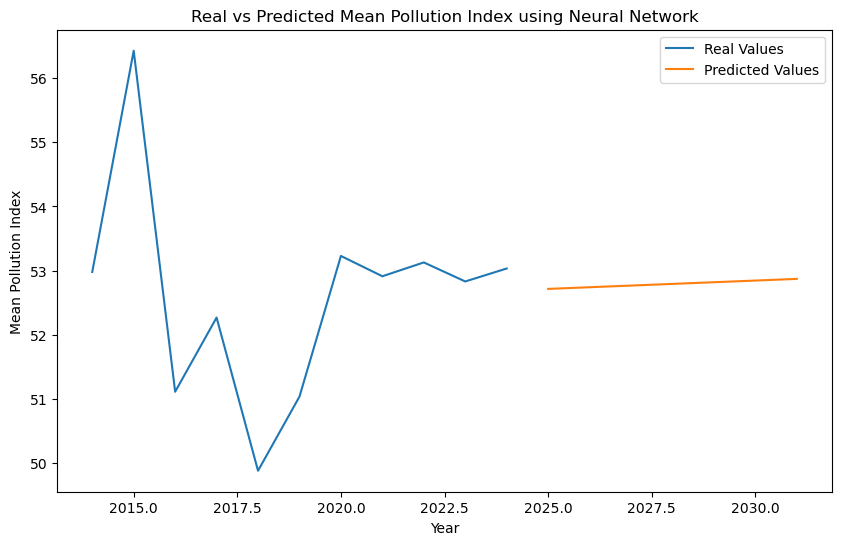

In [6]:
from sklearn.neural_network import MLPRegressor
grouped = df.groupby('Year')['Pollution Index'].mean().reset_index()
X = grouped['Year'].values.reshape(-1, 1)
y = grouped['Pollution Index'].values
model = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000)
model.fit(X, y)
future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030, 2031]).reshape(-1, 1)
predictions = model.predict(future_years)
print(predictions)
plt.figure(figsize=(10, 6))
plt.plot(grouped['Year'], grouped['Pollution Index'], label='Real Values')
plt.plot(future_years, predictions, label='Predicted Values')
plt.xlabel('Year')
plt.ylabel('Mean Pollution Index')
plt.title('Real vs Predicted Mean Pollution Index using Neural Network')
plt.legend()
plt.show()

/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


[53.03294118 53.03294117 53.03294118 53.03294118 53.03294117 53.03294117
 53.03294117]


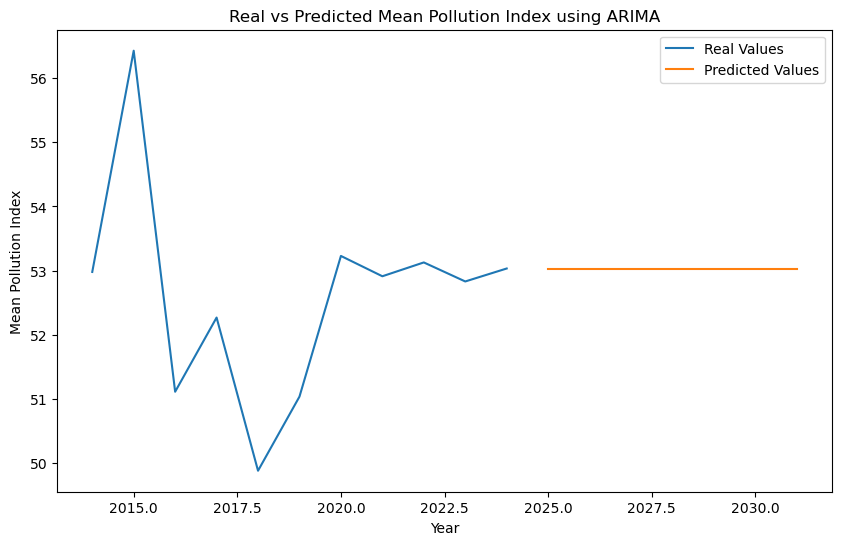

In [19]:
from statsmodels.tsa.arima.model import ARIMA
grouped = df.groupby('Year')['Pollution Index'].mean().reset_index()

X = grouped['Year'].values
y = grouped['Pollution Index'].values
model = ARIMA(y, order=(5,1,0))
model_fit = model.fit()
future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030, 2031])
predictions = model_fit.predict(start=len(X), end=len(X)+len(future_years)-1, typ='levels')

print(predictions)
plt.figure(figsize=(10, 6))
plt.plot(grouped['Year'], grouped['Pollution Index'], label='Real Values')
plt.plot(future_years, predictions, label='Predicted Values')
plt.xlabel('Year')
plt.ylabel('Mean Pollution Index')
plt.title('Real vs Predicted Mean Pollution Index using ARIMA')
plt.legend()
plt.show()

In [8]:
preds = []
for country in df['Country'].unique():
    try:
        country_data = df[df['Country'] == country]['Pollution Index'].values

        model = ARIMA(country_data, order=(5,1,0))
        model_fit = model.fit()

        future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030, 2031])
        predictions = model_fit.predict(start=len(country_data), end=len(country_data)+len(future_years)-1, typ='levels')
        preds.append((country, predictions))
    except:
        print(f'Error for {country}')
        pass



/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Ma

Error for Mongolia


/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Error for Turkmenistan


/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for Bahrain


/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for Armenia
Error for Dominican Republic
Error for Moldova


/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for Bolivia
Error for Cambodia


/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for Costa Rica
Error for Tunisia
Error for Taiwan (China)
Error for Hong Kong (China)
Error for Albania


/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


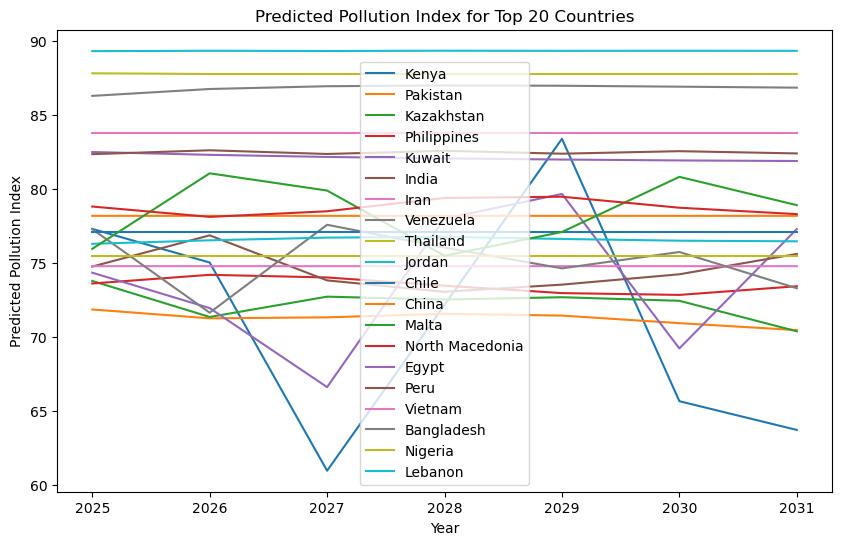

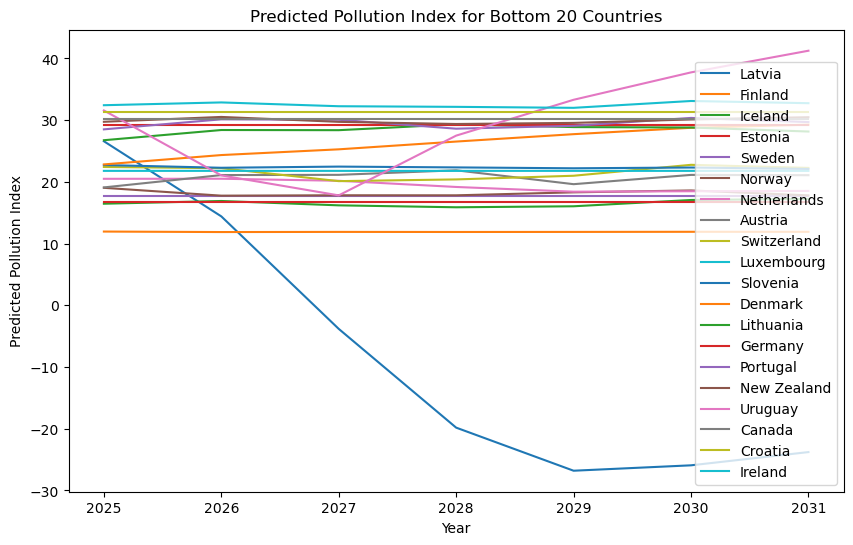

In [9]:
avg_predictions = [(country, np.mean(predictions)) for country, predictions in preds]
sorted_predictions = sorted(avg_predictions, key=lambda x: x[1])
top_20 = sorted_predictions[-20:]
bottom_20 = sorted_predictions[:20]
plt.figure(figsize=(10, 6))
for country, _ in top_20:
    predictions = dict(preds)[country]
    plt.plot(future_years, predictions, label=country)
plt.title('Predicted Pollution Index for Top 20 Countries')
plt.xlabel('Year')
plt.ylabel('Predicted Pollution Index')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
for country, _ in bottom_20:
    predictions = dict(preds)[country]
    plt.plot(future_years, predictions, label=country)
plt.title('Predicted Pollution Index for Bottom 20 Countries')
plt.xlabel('Year')
plt.ylabel('Predicted Pollution Index')
plt.legend()
plt.show()

In [12]:
unique_pays_hm = ['Bangladesh', 'China', 'Pakistan','India' ,'Vietnam', 'Turkey', 'Birmany'
 'Cambodgia', 'Indonesia', 'Morocco', 'Bulgaria', 'Guatemala', 'Kenya', 'Honduras',
 'Romania', 'Mexico', 'Ethiopia', 'Italy']
unique_pays_ever = ['Vietnam', 'Sri Lanka', 'China', 'Bangladesh', 'Peru', 'South Korea']

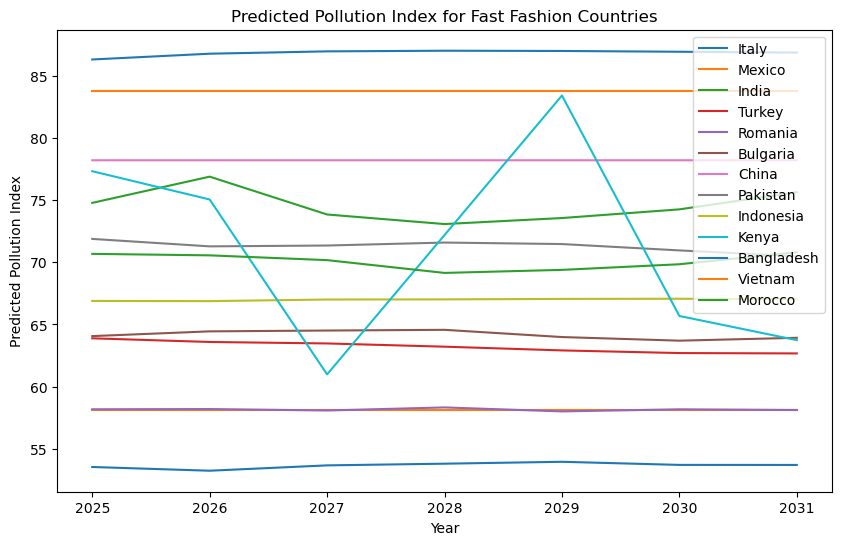

In [11]:
filtered_preds = [(country, predictions) for country, predictions in preds if country in unique_pays_hm]
plt.figure(figsize=(10, 6))
for country, predictions in filtered_preds:
    plt.plot(future_years, predictions, label=country)
plt.title('Predicted Pollution Index for Fast Fashion Countries')
plt.xlabel('Year')
plt.ylabel('Predicted Pollution Index')
plt.legend()
plt.show()

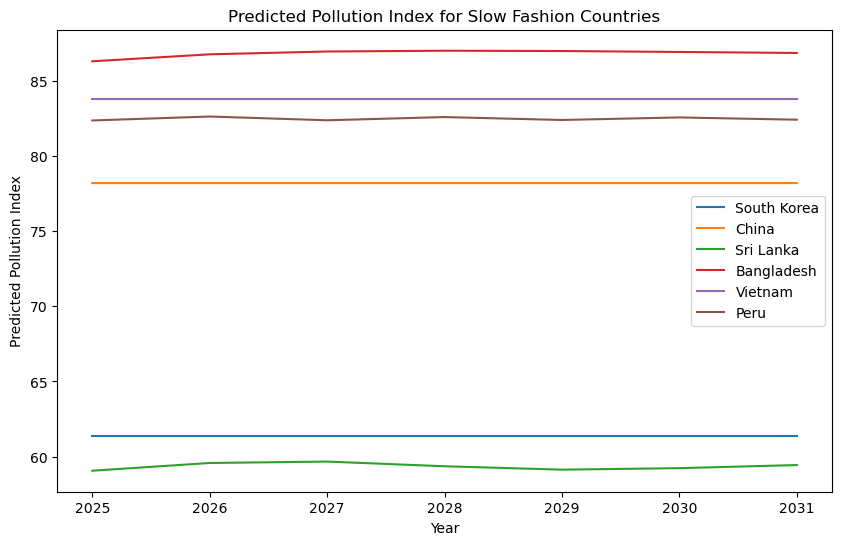

In [13]:
filtered_preds = [(country, predictions) for country, predictions in preds if country in unique_pays_ever]
plt.figure(figsize=(10, 6))
for country, predictions in filtered_preds:
    plt.plot(future_years, predictions, label=country)
plt.title('Predicted Pollution Index for Slow Fashion Countries')
plt.xlabel('Year')
plt.ylabel('Predicted Pollution Index')
plt.legend()
plt.show()

In [14]:
slow_country_counts = df_slow['Country'].explode().value_counts()
fast_country_counts = df_fast['Pays concernés'].explode().value_counts()

#why did we have to scrape in french i hate hm i hate it hate it
french_to_english = {
    'Bangladesh': 'Bangladesh',
    'Chine': 'China',
    'Turquie': 'Turkey',
    'Birmanie': 'Myanmar',
    'Inde': 'India',
    'Cambodge': 'Cambodia',
    'Indonésie': 'Indonesia',
    'Pakistan': 'Pakistan',
    'Vietnam': 'Vietnam',
    'Maroc': 'Morocco',
    'Bulgaria': 'Bulgaria',
    'Roumanie': 'Romania',
    'Mexique': 'Mexico',
    'Guatemala': 'Guatemala',
    'Italy': 'Italy',
    'Honduras': 'Honduras',
    'Ethiopie': 'Ethiopia',
    'Kenya': 'Kenya'
}
fast_country_counts = {french_to_english[country]: count for country, count in fast_country_counts.items()}
print(fast_country_counts)

{'Bangladesh': 951, 'China': 935, 'Turkey': 370, 'Myanmar': 234, 'India': 179, 'Cambodia': 177, 'Indonesia': 153, 'Pakistan': 134, 'Vietnam': 69, 'Morocco': 20, 'Bulgaria': 16, 'Romania': 15, 'Mexico': 10, 'Guatemala': 4, 'Italy': 4, 'Honduras': 2, 'Ethiopia': 2, 'Kenya': 1}


0.030303030303030304 South Korea 1
1.0 China 33
2.0606060606060606 Sri Lanka 68
0.15151515151515152 Bangladesh 5
8.272727272727273 Vietnam 273
0.09090909090909091 Peru 3


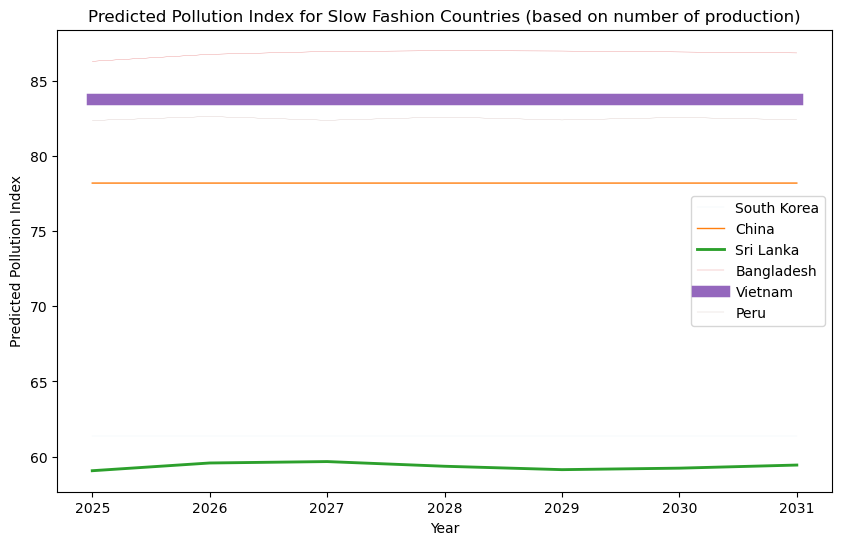

In [15]:
filtered_preds = [(country, predictions) for country, predictions in preds if country in unique_pays_ever]
plt.figure(figsize=(10, 6))
for country, predictions in filtered_preds:
    linewidth = slow_country_counts.get(country, 1) / 33
    print(linewidth, country, slow_country_counts.get(country, 1))
    plt.plot(future_years, predictions, label=country, linewidth=linewidth)
plt.title('Predicted Pollution Index for Slow Fashion Countries (based on number of production)')
plt.xlabel('Year')
plt.ylabel('Predicted Pollution Index')
plt.legend()
plt.show()

0.057971014492753624 Italy 4
0.14492753623188406 Mexico 10
2.5942028985507246 India 179
5.36231884057971 Turkey 370
0.21739130434782608 Romania 15
0.2318840579710145 Bulgaria 16
13.55072463768116 China 935
1.9420289855072463 Pakistan 134
2.217391304347826 Indonesia 153
0.014492753623188406 Kenya 1
13.782608695652174 Bangladesh 951
1.0 Vietnam 69
0.2898550724637681 Morocco 20


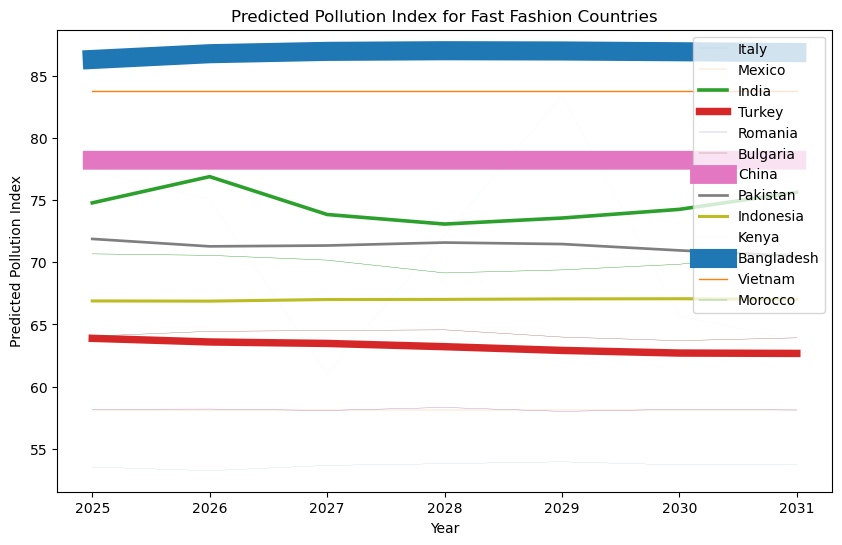

In [16]:
filtered_preds = [(country, predictions) for country, predictions in preds if country in fast_country_counts.keys()]
plt.figure(figsize=(10, 6))
for country, predictions in filtered_preds:
    linewidth = fast_country_counts.get(country, 1) /  69
    print(linewidth, country, fast_country_counts.get(country, 1))
    plt.plot(future_years, predictions, label=country, linewidth=linewidth)
plt.title('Predicted Pollution Index for Fast Fashion Countries')
plt.xlabel('Year')
plt.ylabel('Predicted Pollution Index')
plt.legend()
plt.show()

Linear regression for quality of life

In [22]:
from sklearn.linear_model import LinearRegression

grouped = df.groupby('Year')['Quality of Life Index'].mean().reset_index()
print('Mean pollution index per year')
print(grouped)
model = LinearRegression()

X = grouped['Year'].values.reshape(-1, 1)
y = grouped['Quality of Life Index'].values
model.fit(X, y)

future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030, 2031]).reshape(-1, 1)
predictions = model.predict(future_years)

print(predictions)

Mean pollution index per year
    Year  Quality of Life Index
0   2014              97.635294
1   2015              91.476744
2   2016             146.841071
3   2017             134.323881
4   2018             145.965000
5   2019             142.311268
6   2020             134.100000
7   2021             130.801205
8   2022             132.117241
9   2023             134.925000
10  2024             135.134118
[145.86854557 148.57950284 151.2904601  154.00141737 156.71237463
 159.4233319  162.13428917]


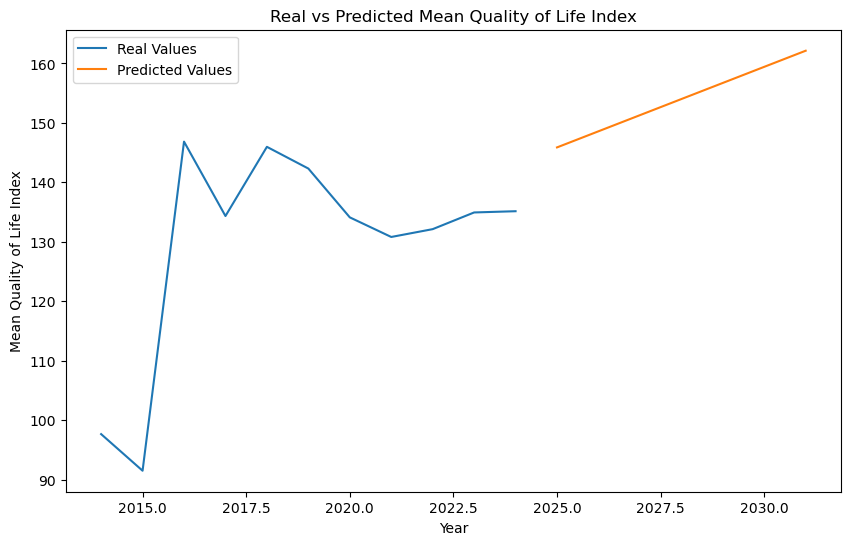

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(grouped['Year'], grouped['Quality of Life Index'], label='Real Values')
plt.plot(future_years, predictions, label='Predicted Values')
plt.xlabel('Year')
plt.ylabel('Mean Quality of Life Index')
plt.title('Real vs Predicted Mean Quality of Life Index')
plt.legend()
plt.show()

[136.85912951 136.92642849 136.99372746 137.06102643 137.12832541
 137.19562438 137.26292336]


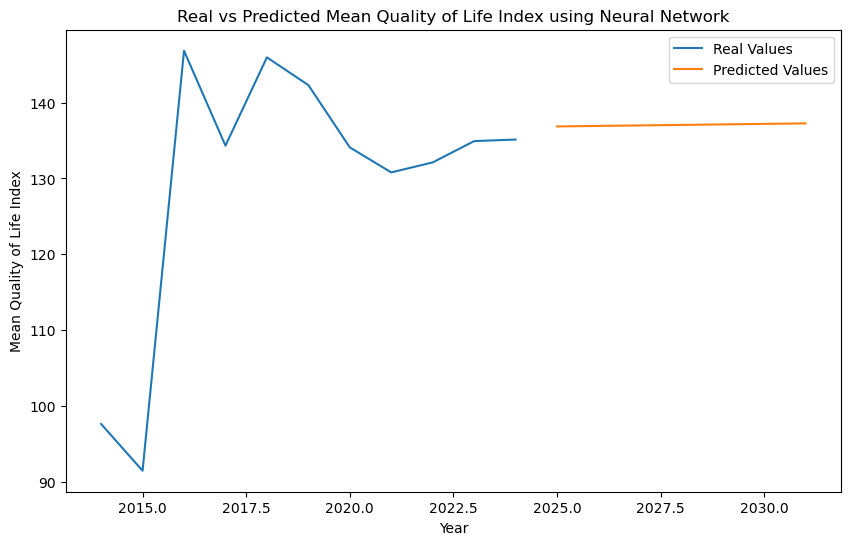

In [24]:
from sklearn.neural_network import MLPRegressor
grouped = df.groupby('Year')['Quality of Life Index'].mean().reset_index()
X = grouped['Year'].values.reshape(-1, 1)
y = grouped['Quality of Life Index'].values
model = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000)
model.fit(X, y)
future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030, 2031]).reshape(-1, 1)
predictions = model.predict(future_years)
print(predictions)
plt.figure(figsize=(10, 6))
plt.plot(grouped['Year'], grouped['Quality of Life Index'], label='Real Values')
plt.plot(future_years, predictions, label='Predicted Values')
plt.xlabel('Year')
plt.ylabel('Mean Quality of Life Index')
plt.title('Real vs Predicted Mean Quality of Life Index using Neural Network')
plt.legend()
plt.show()

[135.13419459 135.13421501 135.13418976 135.13417192 135.13417069
 135.13417069 135.13417069]


/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


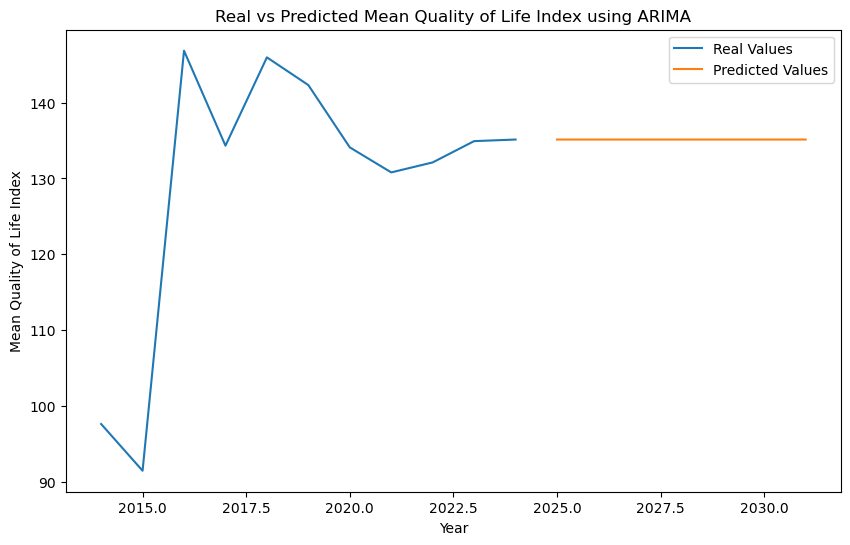

In [25]:
from statsmodels.tsa.arima.model import ARIMA
grouped = df.groupby('Year')['Quality of Life Index'].mean().reset_index()

X = grouped['Year'].values
y = grouped['Quality of Life Index'].values
model = ARIMA(y, order=(5,1,0))
model_fit = model.fit()
future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030, 2031])
predictions = model_fit.predict(start=len(X), end=len(X)+len(future_years)-1, typ='levels')

print(predictions)
plt.figure(figsize=(10, 6))
plt.plot(grouped['Year'], grouped['Quality of Life Index'], label='Real Values')
plt.plot(future_years, predictions, label='Predicted Values')
plt.xlabel('Year')
plt.ylabel('Mean Quality of Life Index')
plt.title('Real vs Predicted Mean Quality of Life Index using ARIMA')
plt.legend()
plt.show()

In [27]:
preds = []
for country in df['Country'].unique():
    try:
        country_data = df[df['Country'] == country]['Quality of Life Index'].values

        model = ARIMA(country_data, order=(5,1,0))
        model_fit = model.fit()

        future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030, 2031])
        predictions = model_fit.predict(start=len(country_data), end=len(country_data)+len(future_years)-1, typ='levels')
        preds.append((country, predictions))
    except:
        print(f'Error for {country}')
        pass



/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaco

Error for Russia


/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for Mongolia


/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Error for Turkmenistan


/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for Bahrain
Error for Armenia
Error for Dominican Republic
Error for Moldova
Error for Bolivia
Error for Cambodia


/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aylinsoykok/opt/anaco

Error for Costa Rica


/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for Tunisia
Error for Taiwan (China)
Error for Hong Kong (China)
Error for Albania


/Users/aylinsoykok/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


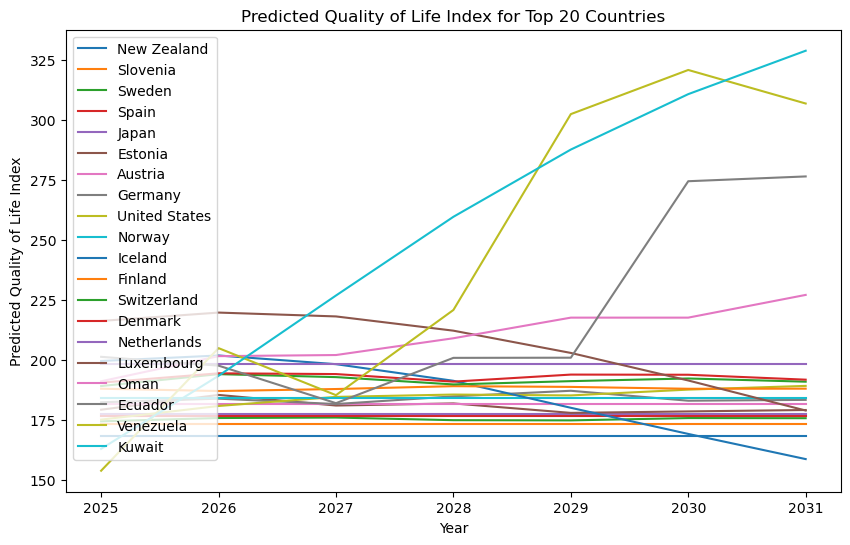

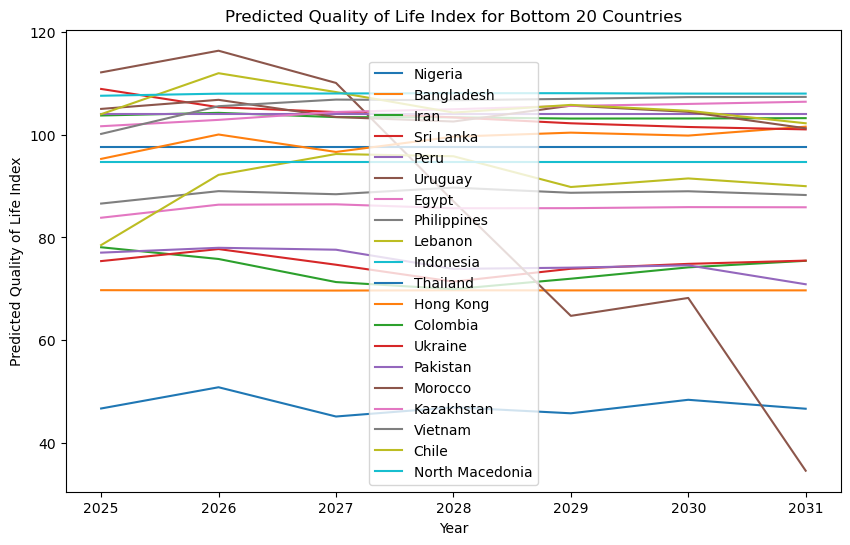

In [28]:
avg_predictions = [(country, np.mean(predictions)) for country, predictions in preds]
sorted_predictions = sorted(avg_predictions, key=lambda x: x[1])
top_20 = sorted_predictions[-20:]
bottom_20 = sorted_predictions[:20]
plt.figure(figsize=(10, 6))
for country, _ in top_20:
    predictions = dict(preds)[country]
    plt.plot(future_years, predictions, label=country)
plt.title('Predicted Quality of Life Index for Top 20 Countries')
plt.xlabel('Year')
plt.ylabel('Predicted Quality of Life Index')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
for country, _ in bottom_20:
    predictions = dict(preds)[country]
    plt.plot(future_years, predictions, label=country)
plt.title('Predicted Quality of Life Index for Bottom 20 Countries')
plt.xlabel('Year')
plt.ylabel('Predicted Quality of Life Index')
plt.legend()
plt.show()

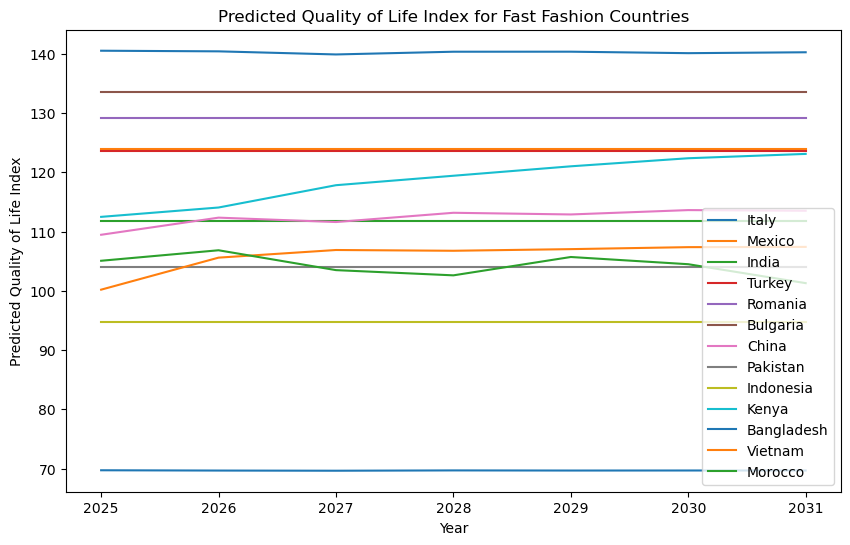

In [29]:
filtered_preds = [(country, predictions) for country, predictions in preds if country in unique_pays_hm]
plt.figure(figsize=(10, 6))
for country, predictions in filtered_preds:
    plt.plot(future_years, predictions, label=country)
plt.title('Predicted Quality of Life Index for Fast Fashion Countries')
plt.xlabel('Year')
plt.ylabel('Predicted Quality of Life Index')
plt.legend()
plt.show()

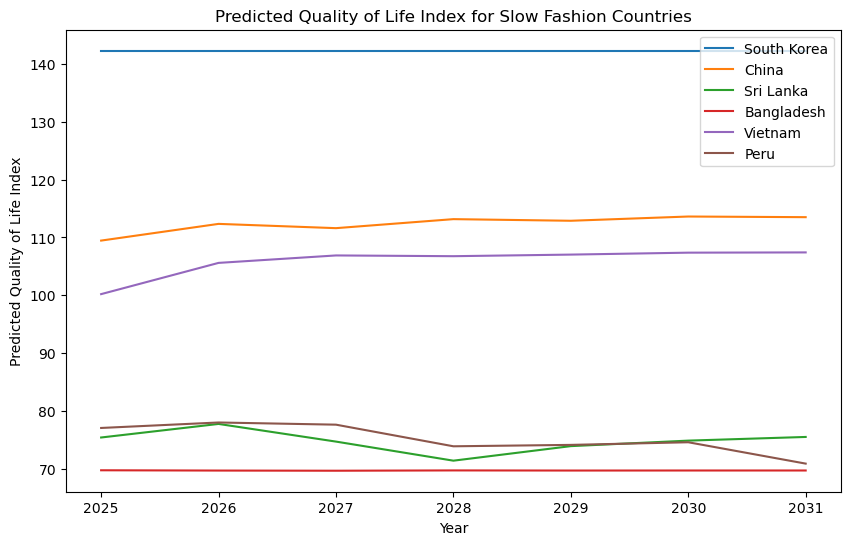

In [30]:
filtered_preds = [(country, predictions) for country, predictions in preds if country in unique_pays_ever]
plt.figure(figsize=(10, 6))
for country, predictions in filtered_preds:
    plt.plot(future_years, predictions, label=country)
plt.title('Predicted Quality of Life Index for Slow Fashion Countries')
plt.xlabel('Year')
plt.ylabel('Predicted Quality of Life Index')
plt.legend()
plt.show()